# Partitioning and processing a dynamic optimization problem

* Construction of dynamic optimization problem

In [1]:
using Plasmo, PlasmoPlots

In [2]:
function create_dynamic_problem()
    T = 100 # number of time points
    d = sin.(1:T) # disturbance vector

    # create an OptiGraph
    graph = Plasmo.OptiGraph()

    # Add nodes for states and controls
    Plasmo.@optinode(graph, state[1:T])
    Plasmo.@optinode(graph, control[1:T-1])
    
    # Add state variables
    for node in state
        Plasmo.@variable(node, x)
        Plasmo.@constraint(node, x >= 0)
        Plasmo.@objective(node, Min, x^2)
    end
    # Add control variables
    for node in control
        Plasmo.@variable(node, u)
        Plasmo.@constraint(node, u >= -1000)
        Plasmo.@objective(node, Min, u^2)
    end

    # dynamic coupling
    Plasmo.@linkconstraint(graph, [i = 1:T-1], state[i+1][:x] == state[i][:x] + control[i][:u] + d[i])

    # initial condition
    n1 = state[1]
    Plasmo.@constraint(n1, n1[:x] == 0)
    return graph
end

create_dynamic_problem (generic function with 1 method)

In [3]:
graph = create_dynamic_problem()

      OptiGraph: # elements (including subgraphs)
-------------------------------------------------------------------
      OptiNodes:   199            (199)
      OptiEdges:    99             (99)
LinkConstraints:    99             (99)
 sub-OptiGraphs:     0              (0)

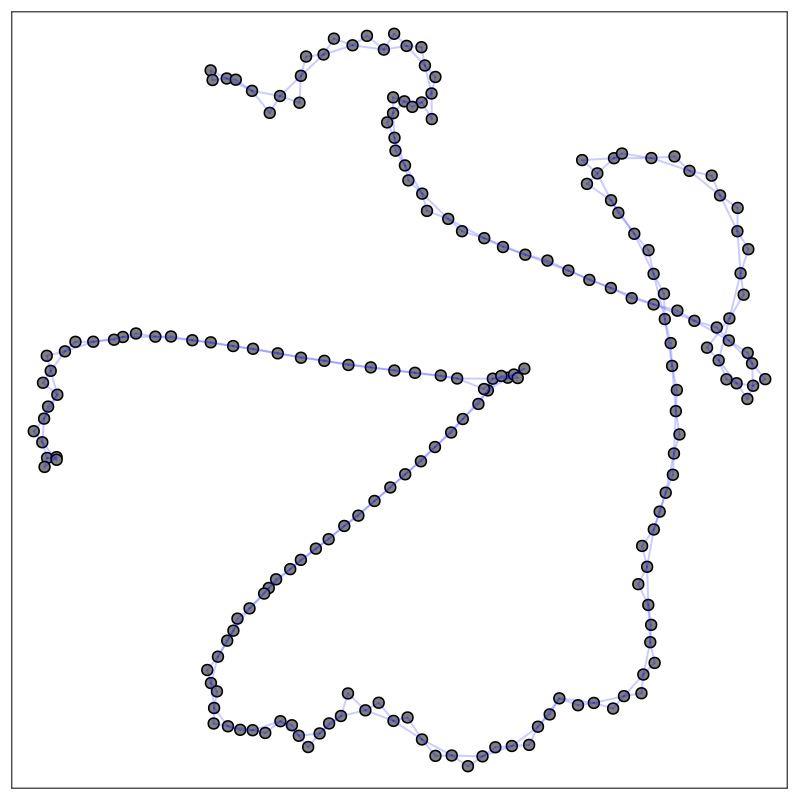

In [6]:
# plot resulting structure
plt_graph4 = PlasmoPlots.layout_plot(graph, layout_options=Dict(:tol=>0.1,:C=>2,:K=>4,:iterations=>500),linealpha=0.2,markersize=6)

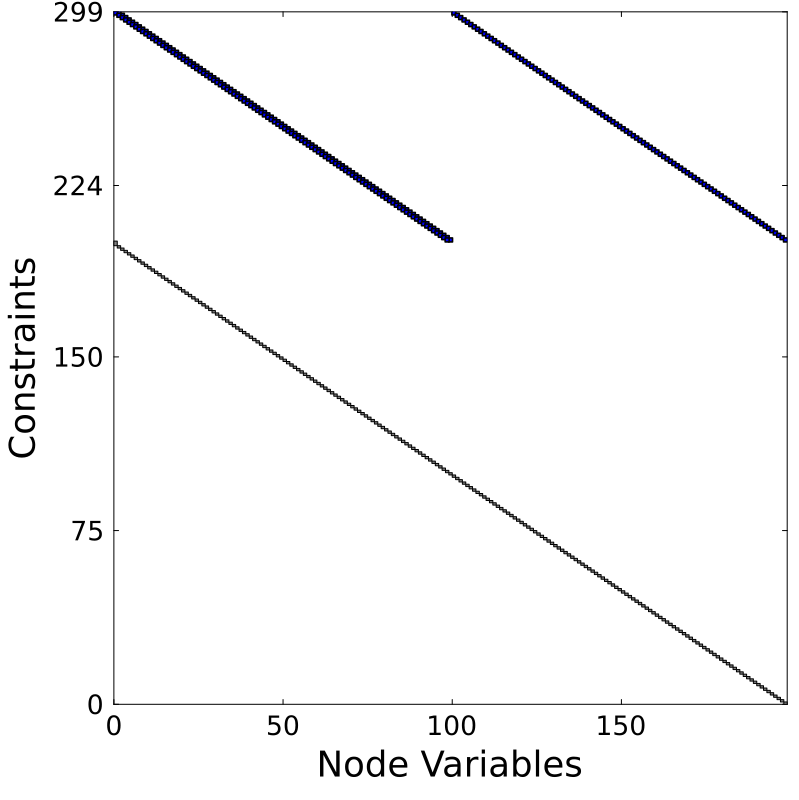

In [14]:
plt_matrix4 = PlasmoPlots.matrix_plot(graph,markersize=2)